## Prepare the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("clean_tweet_tone_df.csv")
df

,Unnamed: 0,Date,Language,Text,clean_text,tone
0,0,2022-09-11 22:22:28+00:00,en,All the medical pain and all the taxes spent p...,medical pain taxes spent putting people jail s...,-0.9531
1,1,2022-09-11 22:21:26+00:00,en,A good way to clean up your follower list is t...,good way clean follower list app called see fo...,0.9184
2,2,2022-09-11 22:12:16+00:00,en,@1zzyzyx1 @MeidasTouch @CharlieCrist legalize ...,legalize marijuana remove barriers desantis p...,-0.4404
3,3,2022-09-11 22:11:15+00:00,en,RT @snoopdoggslungz: 📸 Chem D\n🌱(ig) https://t...,rt chem d ig,0.0000
4,4,2022-09-11 22:06:53+00:00,en,@BabzOnTheMic Off the weed bro. That’s 4 strai...,weed bro thats straight losses miami pats lon...,-0.6369
...,...,...,...,...,...,...
2495,2495,2022-09-07 21:20:14+00:00,en,I just caught someone smoking their weed pen i...,caught someone smoking weed pen class hahahaha...,0.4019
2496,2496,2022-09-07 21:17:48+00:00,en,@AesPolitics And research shows black and brow...,research shows black brown people disproporti...,0.0000
2497,2497,2022-09-07 21:17:39+00:00,en,Smoke weed “ your not responsible and mentally...,smoke weed responsible mentally sick sober ser...,-0.8625
2498,2498,2022-09-07 21:09:58+00:00,en,"People who call weed, cannabis. https://t.co/m...",people call weed cannabis,0.0000


* **Select column clean_text and column tone**

In [3]:
df=df[["clean_text","tone"]]
df

,clean_text,tone
0,medical pain taxes spent putting people jail s...,-0.9531
1,good way clean follower list app called see fo...,0.9184
2,legalize marijuana remove barriers desantis p...,-0.4404
3,rt chem d ig,0.0000
4,weed bro thats straight losses miami pats lon...,-0.6369
...,...,...
2495,caught someone smoking weed pen class hahahaha...,0.4019
2496,research shows black brown people disproporti...,0.0000
2497,smoke weed responsible mentally sick sober ser...,-0.8625
2498,people call weed cannabis,0.0000


* **Change values in the column tone**
  * set value = -1 for the values in range [-1,0), represents the negative tone
  * set value = 1 for the values in range (0,1], represents the positive tone
  * set value = 0 for the values is equal to 0, represents the neutral tone

In [4]:
df['tone']=df['tone'].apply(lambda x: 0 if x == 0 else (1 if x>0 else -1) )
df

C:\Users\l7989\AppData\Local\Temp\ipykernel_24644\1501309909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tone']=df['tone'].apply(lambda x: 0 if x == 0 else (1 if x>0 else -1) )


,clean_text,tone
0,medical pain taxes spent putting people jail s...,-1
1,good way clean follower list app called see fo...,1
2,legalize marijuana remove barriers desantis p...,-1
3,rt chem d ig,0
4,weed bro thats straight losses miami pats lon...,-1
...,...,...
2495,caught someone smoking weed pen class hahahaha...,1
2496,research shows black brown people disproporti...,0
2497,smoke weed responsible mentally sick sober ser...,-1
2498,people call weed cannabis,0


## Data Modelling (Bayes)

* **Vectorizer the content into numbers**

In [5]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
corpus=df['clean_text']
vectorizer = CountVectorizer(stop_words='english' ,lowercase=True)
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out()[:50])
print(X.toarray()[:20])

print("the shape of the matrix is ",X.toarray().shape)

['aahn' 'aaron' 'ab' 'abc' 'ability' 'able' 'abolished' 'abolitionism'
 'abortion' 'abortions' 'abroad' 'absolute' 'absolutely' 'abt' 'abundance'
 'abuse' 'abusers' 'accept' 'acceptable' 'accepted' 'accepts' 'access'
 'accessory' 'accident' 'accomplished' 'according' 'account' 'accountant'
 'accounts' 'accretive' 'accumulate' 'accurately' 'accustomed' 'ace'
 'achieved' 'achievement' 'achievements' 'acid' 'acquiring' 'acquisition'
 'acre' 'acres' 'acro' 'act' 'acted' 'acting' 'action' 'actions' 'active'
 'activist']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the shape of the matrix is  (2500, 6345)


* **Built up the train dataset and the test dataset**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

x_train,x_test,y_train,y_test=train_test_split(X,df['tone'],test_size=0.2)

print("X_train.shape",x_train.shape)
print("y_train.shape",y_train.shape)
print("X_test.shape",x_test.shape)
print("y_test.shape",y_test.shape)

X_train.shape (2000, 6345)
y_train.shape (2000,)
X_test.shape (500, 6345)
y_test.shape (500,)


* **Fit in MultinomialNB**

In [27]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1)
clf.fit(x_train, y_train)

MultinomialNB(alpha=1)

## Model Evaluation

* **Result Summary**

In [29]:
print("ACCURACY CALCULATION")
print("TRAINING SET:")
yp_train=clf.predict(x_train)
train_total=len(y_train)
wrong_train=np.count_nonzero(yp_train-y_train)
print("Accuracy:",100-(wrong_train/train_total)*100)
print("Number of mislabeled points out of a total 2000 points = ",wrong_train)

print()

print("TEST SET:")
yp_test=clf.predict(x_test)
test_total=len(y_test)
wrong_test=np.count_nonzero(yp_test-y_test)
print("Accuracy:",100-(wrong_test/test_total)*100)
print("Number of mislabeled points out of a total 500 points = ",wrong_test)



ACCURACY CALCULATION
TRAINING SET:
Accuracy: 91.15
Number of mislabeled points out of a total 2000 points =  177

TEST SET:
Accuracy: 67.19999999999999
Number of mislabeled points out of a total 500 points =  164


* **Confusion Matrix**

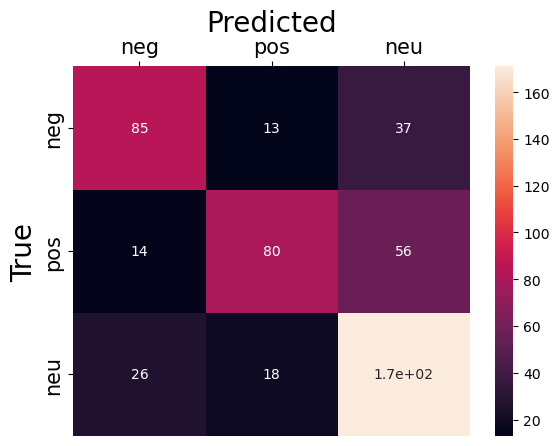

In [38]:
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
conf_mat = confusion_matrix(
        y_test, yp_test)
sns.heatmap(conf_mat, annot=True)
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['neg', 'pos','neu'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['neg', 'pos','neu'], fontsize = 15)
plt.show()
